In [1]:
import os
import time, datetime
from datetime import timedelta
import pandas as pd
import numpy as np
import sys
import time
import pickle
import warnings
from datetime import datetime
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization, Dropout, Conv1D, GlobalMaxPool1D, SimpleRNN
from keras import backend as K
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest

Using TensorFlow backend.


In [71]:
path = '/data01/CSB/CSB_Jupyter/PROBE/DEMO/CT/KEH-test'
#os.chdir(path)

Slice_id = 'Slice61'
data_type = 'uplink-throughput'  #prediction-uplink-throughput , prediction-downlink-throughput, prediction-active-user
ml_type = "prediction"
time = '2019-12-24T11:05:00'
directory = path

date_list=[Slice_id + "_" + data_type + "_" + '20200222' + ".csv", Slice_id + "_" + data_type + "_" + '20200223' + ".csv",
           Slice_id + "_" + data_type + "_" + '20200222' + ".csv", Slice_id + "_" + data_type + "_" + '20200223' + ".csv"]


model_save = Slice_id +"-"+ ml_type + "-"+ data_type + ".h5"

#======================================================================================================================#
# Data Load :  data_type
#======================================================================================================================#
if data_type == 'uplink-throughput':
    try:
        ct = pd.DataFrame(columns = ['SLICE', 'DATETIME', 'UPLINK_THROUGHPUT'])
        for i in range(len(date_list)):
            a = pd.read_csv(directory + "/" + date_list[i], header = None)
            a.columns = ['SLICE', 'DATETIME', 'UPLINK_THROUGHPUT']
            ct = pd.concat([ct, a])
    except:
        print("FileNotFoundError : Change Windows size")
        

elif data_type == 'downlink-throughput':
    try:
        ct = pd.DataFrame(columns=['SLICE', 'DATETIME', 'DNLINK_THROUGHPUT'])
        for i in range(len(date_list)):
            a = pd.read_csv(directory + "/" + date_list[i] , header = None)
            a.columns = ['SLICE', 'DATETIME', 'DNLINK_THROUGHPUT']
            ct = pd.concat([ct, a])
    except:
        print("FileNotFoundError : Change Windows size")
        

else:
    try:
        ct = pd.DataFrame(columns=['SLICE', 'DATETIME', 'ACTIVE_USER'])
        for i in range(len(date_list)):
            a = pd.read_csv(directory + "/" + date_list[i], header = None)
            a.columns = ['SLICE', 'DATETIME', 'ACTIVE_USER']
            ct = pd.concat([ct, a])
    except:
        print("FileNotFoundError : Change Windows size")

,SLICE,DATETIME,UPLINK_THROUGHPUT
0,Slice61,2020-02-22T00:00:00,3154332
1,Slice61,2020-02-22T00:05:00,2318425
2,Slice61,2020-02-22T00:10:00,2357537
3,Slice61,2020-02-22T00:15:00,2281543
4,Slice61,2020-02-22T00:20:00,2072260
...,...,...,...
283,Slice61,2020-02-23T23:35:00,2851202
284,Slice61,2020-02-23T23:40:00,2881031
285,Slice61,2020-02-23T23:45:00,3465336
286,Slice61,2020-02-23T23:50:00,2643012


In [7]:
Slice_id = 'Slice61'
data_type = 'prediction-uplink-throughput'  #prediction-uplink-throughput , prediction-downlink-throughput, prediction-active-user
time = '2020-02-22T23:55:00'
value = 2360093

path = '/data01/CSB/CSB_Jupyter/PROBE/DEMO/CT/KEH-test'
os.chdir(path)
file_list = os.listdir(path)

# slice-id 와 type에 맞는 model.
model = load_model(Slice_id + '-' + data_type + '.h5')

if Slice_id + '-' + data_type + '.p' in file_list:
    with open(Slice_id + '-' + data_type + '.p', 'rb') as f:
        data = pickle.load(f)
        
len(data)      

287

In [9]:
# python Prediction-uplink-throughput.py Slice61 prediction-uplink-throughput 2020-02-22T23:55:00 2360093

Slice_id = 'Slice61'
data_type = 'prediction-uplink-throughput'  #prediction-uplink-throughput , prediction-downlink-throughput, prediction-active-user
time = '2020-02-22T23:55:00'
value = 2360093
num = 288


# slice-id 와 type에 맞는 model.
model = load_model(Slice_id + '-' + data_type + '.h5')

if Slice_id + '-' + data_type + '.p' in file_list:
    with open(Slice_id + '-' + data_type + '.p', 'rb') as f:
        data = pickle.load(f)

    if len(data) < (num-1):
        data.append(float(value))

        with open(Slice_id + '-' +data_type + '.p', 'wb') as f:
            pickle.dump(data, f)

        print('0x64' + str(800), Slice_id, data_type, time,value, sep= ',')



    else:
        # 여기가 진짜 실행하는 코드

        data = list(map(float, data))
        prediction = np.concatenate([pd.DataFrame(data).values, np.reshape(float(value), (1, 1))])

        result = model.predict(np.reshape(prediction, (1, num, 1)) / 1e8) * 1e8  #144

        a = datetime.strptime(time, "%Y-%m-%dT%H:%M:%S")

        data.append(float(value))

       
        #with open(Slice_id + '-' + data_type + '.p', 'wb') as f:
        #    pickle.dump(data[1:], f)
          

        print('status', 'slice-id', 'type', 'time', 'value', sep = ',')
        
        b = []
        for i in range(12):
            if result[0][i] > 0:
                print('0x64' + str(200), Slice_id, data_type,
                      str((a + timedelta(minutes=5 * (i + 1))).date()) + 'T' + str(
                          (a + timedelta(minutes=5 * (i + 1))).time()), result[0][i], sep= ',')
                bb = result[0][i]
                b.append(bb)
                
            else:
                print('0x64' + str(500), Slice_id, data_type,
                      str((a + timedelta(minutes=5 * (i + 1))).date()) + 'T' + str(
                          (a + timedelta(minutes=5 * (i + 1))).time()), result[0][i], sep= ',')

                bb = result[0][i]
                b.append(bb)
                
else:

    with open(Slice_id + '-' + data_type + '.p', 'wb') as f:
        pickle.dump([float(value)], f)

    print('0x64' + str(800), Slice_id, data_type, time, value, sep= ',')

status,slice-id,type,time,value
0x64500,Slice61,prediction-uplink-throughput,2020-02-23T00:00:00,-12232220.0
0x64200,Slice61,prediction-uplink-throughput,2020-02-23T00:05:00,31152606.0
0x64500,Slice61,prediction-uplink-throughput,2020-02-23T00:10:00,-33053256.0
0x64200,Slice61,prediction-uplink-throughput,2020-02-23T00:15:00,24101030.0
0x64500,Slice61,prediction-uplink-throughput,2020-02-23T00:20:00,-47374852.0
0x64500,Slice61,prediction-uplink-throughput,2020-02-23T00:25:00,-45051616.0
0x64500,Slice61,prediction-uplink-throughput,2020-02-23T00:30:00,-62391156.0
0x64500,Slice61,prediction-uplink-throughput,2020-02-23T00:35:00,-58884324.0
0x64500,Slice61,prediction-uplink-throughput,2020-02-23T00:40:00,-44488140.0
0x64500,Slice61,prediction-uplink-throughput,2020-02-23T00:45:00,-91606440.0
0x64500,Slice61,prediction-uplink-throughput,2020-02-23T00:50:00,-66089124.0
0x64500,Slice61,prediction-uplink-throughput,2020-02-23T00:55:00,-132184120.0


In [10]:
num = 0

raw1 = pd.read_csv('Slice61_uplink-throughput_20200222.csv', header = None)
raw1.columns = ['slice_id', 'date', 'value']
raw1 = raw1[275:]

raw2 = pd.read_csv('Slice61_uplink-throughput_20200223.csv', header = None)
raw2.columns = ['slice_id', 'date', 'value']

raw2 = raw2[num:(num+12)].reset_index(drop=True)
raw2 = pd.concat([raw1,raw2]).reset_index(drop = True)

b2 = pd.DataFrame(b, columns = ['value'])
b2 = pd.concat([raw1,b2]).reset_index(drop=True)
b2.columns = ['value2']

raw2 = pd.concat([raw2, b2], axis = 1)
raw2

/home/eunhye/anaconda3/envs/csb2/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


ValueError: Length mismatch: Expected axis has 3 elements, new values have 1 elements

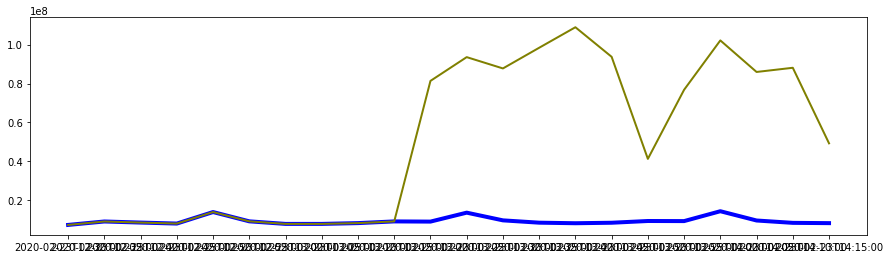

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))
plt.plot( 'date', 'value', data=xx,  color='blue', linewidth=4)
plt.plot( 'date', 'value2', data=xx, color='olive', linewidth=2)
plt.show()